# About

How Prophet works. At its core, the Prophet procedure is an additive regression model with four main components: A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

It is designed to be easy and completely automatic, e.g. point it at a time series and get a forecast. As such, it is intended for internal company use, such as forecasting sales, capacity, etc

# Resources

- Time Series Forecasting With Prophet in Python: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

# Setting up

In [1]:
! pip install fbprophet

  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'E:\Python\envs\time_series\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Windows PC\\AppData\\Local\\Temp\\pip-install-2ztvsswg\\fbprophet_1f98c10b404943468d39671fa180f46c\\setup.py'"'"'; __file__='"'"'C:\\Users\\Windows PC\\AppData\\Local\\Temp\\pip-install-2ztvsswg\\fbprophet_1f98c10b404943468d39671fa180f46c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Windows PC\AppData\Local\Temp\pip-wheel-yadvgzaw'
       cwd: C:\Users\Windows PC\AppData\Local\Temp\pip-install-2ztvsswg\fbprophet_1f98c10b404943468d39671fa180f46c\
  Complete output (47 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating b

In [5]:
# see https://github.com/facebook/prophet/issues/1939 to overcome problems with installing

In [3]:
! pip install pystan==2.19.1.1

In [4]:
! pip install prophet

  Attempting uninstall: holidays
    Found existing installation: holidays 0.13
    Uninstalling holidays-0.13:
      Successfully uninstalled holidays-0.13
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [8]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.2


# Load and summarise data

In [9]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


# Plot data 
To see if we spot some trends, seasonal cycle, outliers or more

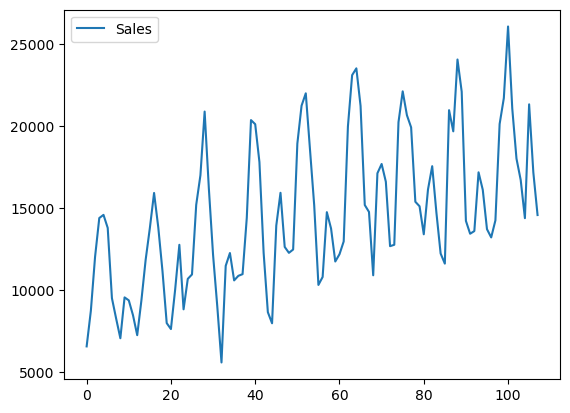

In [10]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

## Fit Prophet Model
To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

This means we change the column names in the dataset. It also requires that the first column be converted to date-time objects, if they are not already (e.g. this can be down as part of loading the dataset with the right arguments to read_csv).

For example, we can modify our loaded car sales dataset to have this expected structure, as follows:

In [15]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from prophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

22:57:22 - cmdstanpy - INFO - Chain [1] start processing
22:57:22 - cmdstanpy - INFO - Chain [1] done processing


# Make a in-sample forecast

It can be useful to make a forecast on historical data.

That is, we can make a forecast on data used as input to train the model. Ideally, the model has seen the data before and would make a perfect prediction.

Nevertheless, this is not the case as the model tries to generalize across all cases in the data.

This is called making an in-sample (in training set sample) forecast and reviewing the results can give insight into how good the model is. That is, how well it learned the training data.

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named ‘ds‘ and rows with date-times for all the intervals to be predicted.

There are many ways to create this “forecast” DataFrame. In this case, we will loop over one year of dates, e.g. the last 12 months in the dataset, and create a string for each month. We will then convert the list of dates into a DataFrame and convert the string values into date-time objects.

In [37]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# print(df)
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	print(date)
	future.append([date])
	
# print(future)

23:10:20 - cmdstanpy - INFO - Chain [1] start processing
23:10:20 - cmdstanpy - INFO - Chain [1] done processing


1968-01
1968-02
1968-03
1968-04
1968-05
1968-06
1968-07
1968-08
1968-09
1968-10
1968-11
1968-12


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14366.950441  12692.056369  15870.127173
1 1968-02-01  14931.417879  13357.758501  16580.162427
2 1968-03-01  20853.806412  19224.777851  22457.213306
3 1968-04-01  22896.047629  21496.852459  24462.370219
4 1968-05-01  24212.079305  22739.207829  25807.042460


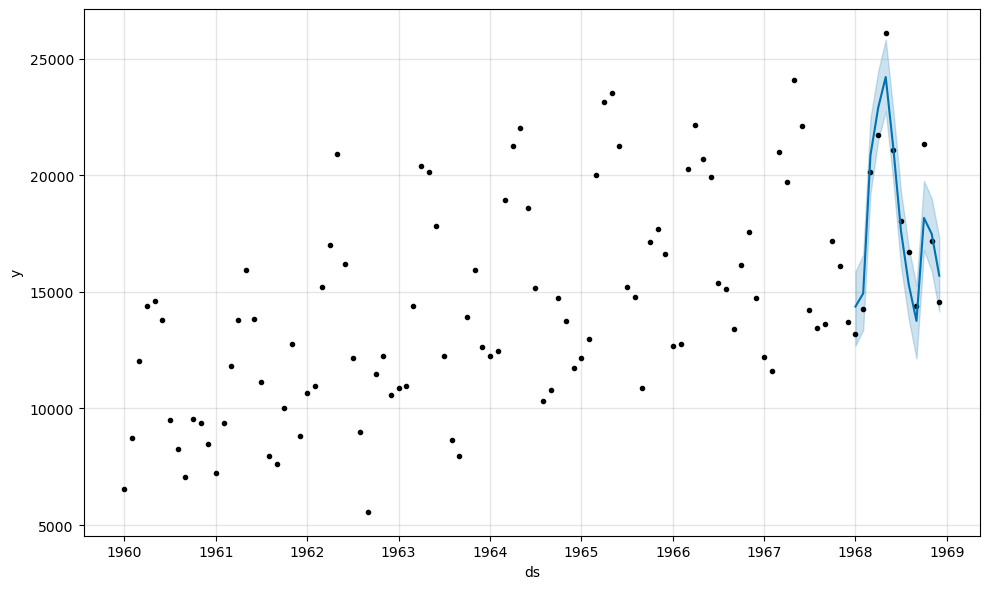

In [38]:

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# print(future)
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Make an out-of-sample forecast

In practice, we really want a forecast model to make a prediction beyond the training data.

This is called an out-of-sample forecast.

We can achieve this in the same way as an in-sample forecast and simply specify a different forecast period.

In this case, a period beyond the end of the training dataset, starting 1969-01.

23:09:20 - cmdstanpy - INFO - Chain [1] start processing
23:09:20 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.503433  13848.574894  17052.503212
1 1969-02-01  16169.601828  14566.807828  17618.835944
2 1969-03-01  21375.275888  19701.845557  22964.581993
3 1969-04-01  23513.699386  21913.562107  25191.565746
4 1969-05-01  25030.879738  23516.164178  26653.956076


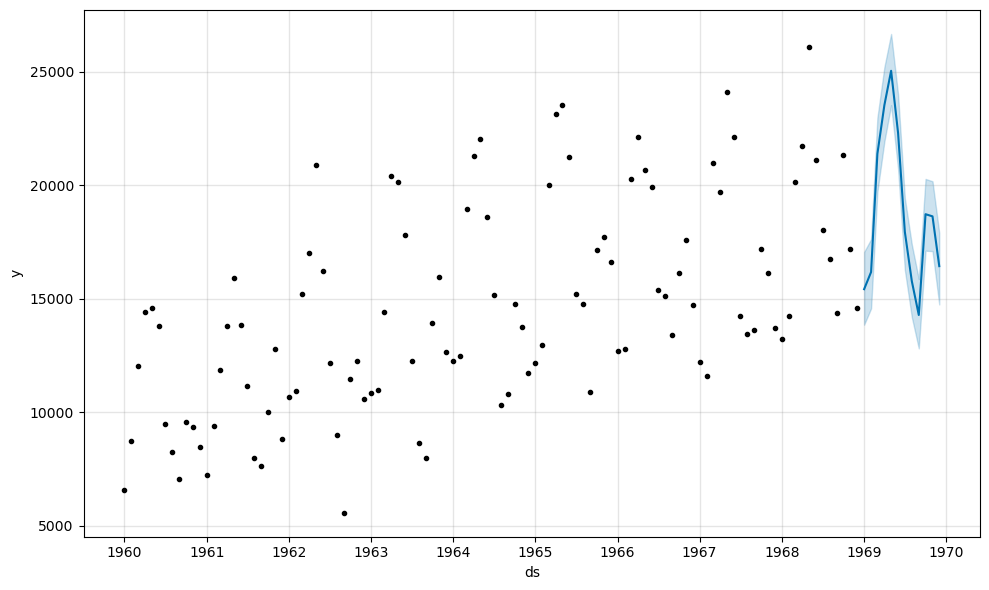

In [33]:
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	# print(date)
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Manually Evaluate Forecast Model

It is critical to develop an objective estimate of a forecast model’s performance.

This can be achieved by holding some data back from the model, such as the last 12 months. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

In [22]:
! pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d3ca27836fc953b21a9158517a805327df19c3b9a0652fca95b0ec25a354333b
  Stored in directory: c:\users\windows pc\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


    ERROR: Command errored out with exit status 1:
     command: 'E:\Python\envs\time_series\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Windows PC\\AppData\\Local\\Temp\\pip-install-cuyjmc7g\\sklearn_ac3228d90bc6403588b73bee944f31d5\\setup.py'"'"'; __file__='"'"'C:\\Users\\Windows PC\\AppData\\Local\\Temp\\pip-install-cuyjmc7g\\sklearn_ac3228d90bc6403588b73bee944f31d5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Windows PC\AppData\Local\Temp\pip-pip-egg-info-588s7fn4'
         cwd: C:\Users\Windows PC\AppData\Local\Temp\pip-install-cuyjmc7g\sklearn_ac3228d90bc6403588b73bee944f31d5\
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather

23:03:07 - cmdstanpy - INFO - Chain [1] start processing


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


23:03:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1336.813


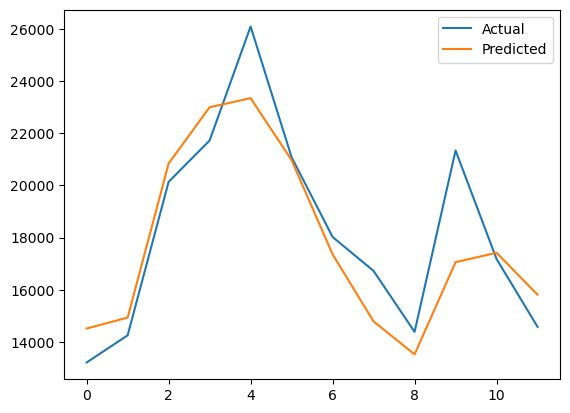

In [23]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# Summary
In this tutorial, you discovered how to use the Facebook Prophet library for time series forecasting.

Specifically, you learned:

Prophet is an open-source library developed by Facebook and designed for automatic forecasting of univariate time series data.
How to fit Prophet models and use them to make in-sample and out-of-sample forecasts.
How to evaluate a Prophet model on a hold-out dataset.
Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.